# My sequence

In [1]:

import sys
sys.path.append('..')
from assignment3.iteration import EMProcess
from assignment3.evaluator import Evaluator
from assignment3.utils import *
from assignment3.build_matrices import *


In [2]:
train_files = ['../data/my.fasta']
test_files = ['../data/my.fasta']
train_sequences = get_seqs_from_files(train_files)
test_sequences = get_seqs_from_files(test_files)
k = 5
background = [0.25]*4
pseudo_counts = get_pseudo_count_vector()
print('pseudo_counts = ', pseudo_counts)

pseudo_counts =  [0.0625, 0.0625, 0.0625, 0.0625]


# EM

In [3]:
def get_entropies(processes):
    entropies = np.array([p.wmm.entropy for p in processes])
    return entropies

In [4]:
seeds = get_seed_kmers(train_sequences[0] ,k)

processes = []
all_entropies = {}
for seed in seeds:

    process = EMProcess(train_sequences, k , background)
    processes.append(process)
    process.initialize(seed,pseudo_counts)

for i in range(3):
    for process in processes:
        process.iterate()
    all_entropies[i+1] = get_entropies(processes)


### ABC

For each of the S seed WMMs defined in "Initialization," do three E-step/M-step pairs. Among the resulting S WMMs, select three WMMs: the ones attaining the highest entropy (relative to background), the median entropy, and the lowest entropy. Call these WMMs A, B and C, respectively.



In [5]:
entropies = np.array([p.wmm.entropy for p in processes])


highest, median, lowest = np.argmax(entropies), np.argsort(entropies)[len(entropies)//2], np.argmin(entropies)
print('highest, median, lowest = ',highest, median, lowest)
print(entropies)

highest, median, lowest =  25 24 19
[4.44612855 4.23058597 4.57916413 3.35589977 4.57972012 4.79489905
 4.2262213  3.48885414 3.80025088 3.26156841 2.63568662 3.2527913
 3.63007053 4.67858413 3.65428348 4.32359575 5.70965336 6.38083563
 6.14877664 1.17005007 3.1512185  2.50799335 2.66474723 2.63561454
 4.20256397 7.70066194]


In [6]:
import copy
A, B, C = processes[highest].wmm, processes[median].wmm, processes[lowest].wmm
A,B,C = copy.deepcopy(A),copy.deepcopy(B),copy.deepcopy(C)


### Additional 7 rounds 

In [7]:
for i in range(7):
    for process in processes:
        process.iterate()
    all_entropies[i+1+3] = get_entropies(processes)

### D
Run an additional 7 E-step/M-step pairs on all S of the third-round WMMs (a total of 10 E-M rounds on each). Select as your final "motif" the best (highest entropy) of the S candidates after round 10; call this WMM D.

In [8]:
entropies_7 = np.array([p.wmm.entropy for p in processes])
print(entropies_7)
D = processes[np.argmax(entropies_7)].wmm
print(D.entropy)

[7.7671202  4.73453939 6.00122673 6.3613387  5.40992156 5.81927413
 5.14049001 5.21633825 5.06502866 7.2652185  5.57015412 3.91262186
 5.80881014 6.16870869 6.2072426  5.75280223 6.3002866  6.81149818
 6.19996876 2.92664056 4.30149265 7.64834989 5.55199916 4.24211948
 5.56548872 7.71381385]
7.767120196363531


### Entropy table 
As a simple descriptive summary of this process, print in a tidy-ish S row by 11 column table the entropies of each seed WMM and its 10 successive E-M-refined iterates.

In [9]:
import pandas as pd
table = pd.DataFrame(all_entropies)
table['seed'] = seeds 
table = table[['seed'] + table.columns.tolist()[:-1]]
table.style.set_caption("Entropy : rows = seed numbers, columns = EM iterations")
print("Entropy : rows = seed numbers, columns = EM iterations")
table

Entropy : rows = seed numbers, columns = EM iterations


,seed,1,2,3,4,5,6,7,8,9,10
0,GTCGC,3.342057,3.557949,4.446129,5.993234,7.142080,7.621148,7.750704,7.773053,7.772055,7.767120
1,CGCCT,3.501842,3.930574,4.230586,4.403327,4.518997,4.601294,4.658608,4.696487,4.720230,4.734539
2,CCTTG,4.256124,4.391274,4.579164,4.749143,5.031818,5.501874,5.899797,6.032053,6.031321,6.001227
3,TTGCG,3.265654,3.147980,3.355900,3.713053,4.296770,5.128139,5.817307,6.183187,6.322217,6.361339
4,GCGGG,3.786970,4.101178,4.579720,4.944082,5.161028,5.278531,5.341777,5.376871,5.397297,5.409922
5,GGGCG,4.303775,4.533684,4.794899,4.931738,5.008237,5.082801,5.196414,5.377502,5.609737,5.819274
6,GCGAC,3.188739,3.641965,4.226221,4.627917,4.835957,4.937449,4.998324,5.047300,5.093896,5.140490
7,GACTA,3.262268,3.306465,3.488854,3.643892,3.818426,4.043433,4.302403,4.575928,4.876024,5.216338
8,CTATG,3.523670,3.506614,3.800251,4.126636,4.382635,4.561351,4.695411,4.816003,4.939475,5.065029
9,ATGTT,3.464974,3.188388,3.261568,3.594098,4.004288,4.382703,4.953425,5.860044,6.670656,7.265219


### Also print the frequency matrices for WMMs A, B, C, and D.

In [10]:
for name, wmm in zip('ABCD', [A,B,C,D]):
    fm = calculateProbabilities(wmm, background)
    print(f'\n\nFrequency matrix for {name}')
    print(fm)



Frequency matrix for A
          1         2         3         4         5
A  0.960935  0.012158  0.012337  0.012520  0.015831
C  0.012154  0.011916  0.865567  0.012356  0.012005
G  0.014143  0.113332  0.013859  0.963069  0.956217
T  0.012768  0.862595  0.108238  0.012055  0.015947


Frequency matrix for B
          1         2         3         4         5
A  0.183893  0.282027  0.897963  0.039469  0.152529
C  0.348506  0.515497  0.028044  0.013933  0.703565
G  0.418032  0.050000  0.032544  0.022376  0.049539
T  0.049569  0.152476  0.041449  0.924221  0.094367


Frequency matrix for C
          1         2         3         4         5
A  0.111839  0.232706  0.283771  0.080336  0.179448
C  0.102252  0.372535  0.093689  0.445746  0.315037
G  0.665092  0.289873  0.163160  0.299075  0.190759
T  0.120818  0.104885  0.459380  0.174843  0.314757


Frequency matrix for D
          1         2         3         4         5
A  0.960483  0.012049  0.012241  0.012282  0.015669
C  0.012080  0.0

# Evaluation

### Plot Scores
To use this as a "gold standard" against which to evaluate a motif, you scan each sequence with your motif WMM, scoring each of the 113-k+1 potential start positions.

 Evaluating for wmm A


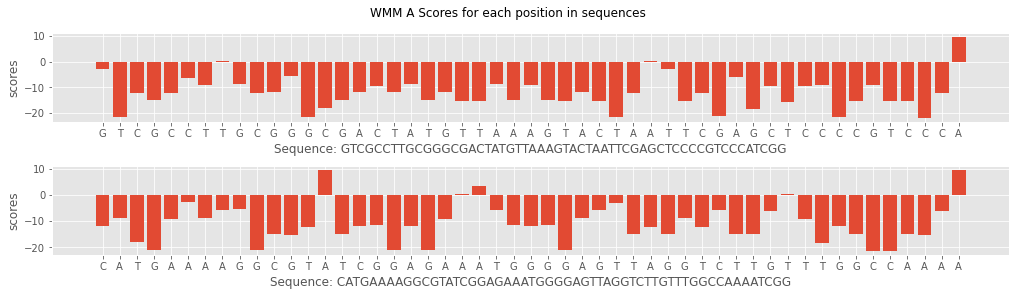

 Evaluating for wmm B


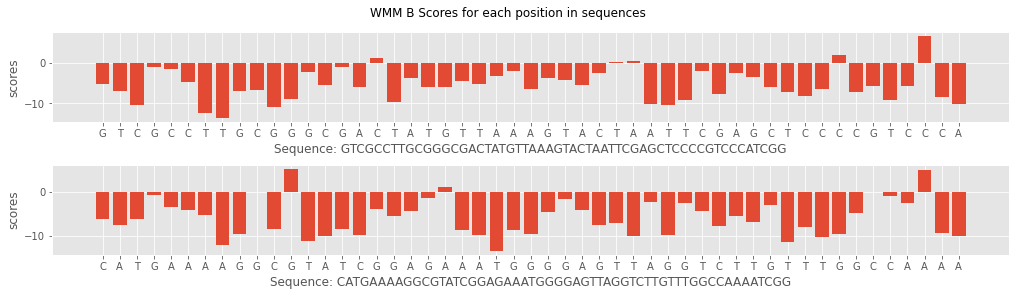

 Evaluating for wmm C


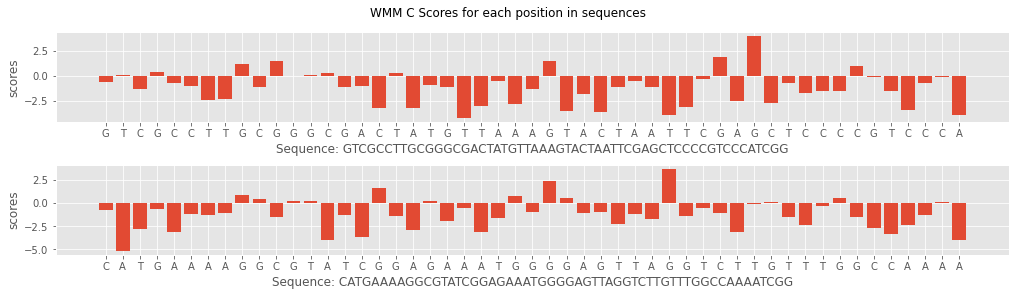

 Evaluating for wmm D


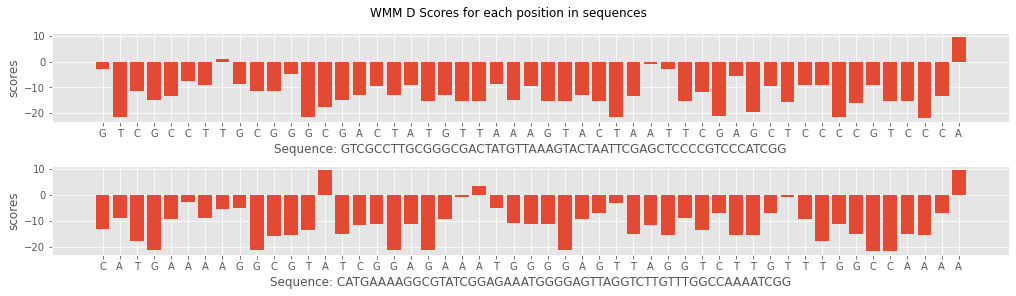

In [11]:
evals = []
for name, wmm in zip('ABCD', [A,B,C,D]):
    print(f' Evaluating for wmm {name}')
    eval = Evaluator(wmm, test_sequences)
    eval.name = name
    evals.append(eval)
    eval.plot_results()

    # combine scores and create y_true. Calculate ROC

### Motif predicted position histogram
1. Let c(j) be the count of the number of test sequences whose highest WMM score (leftmost highest, if ties) occurred at position j . Plot this histogram. 
 
2. Additionally, calculate and print m = arg max { c(j) | 1 ≤ j ≤ 113-k+1 }. 
    1. I.e., m is the most common location of the best motif hit in each sequence; 
    1. equivalently, it is the peak in the c(j) histogram.
    1. If things are working correctly, most of the best motif hits should overlap the gold-standard location by at least k/2 positions, i.e., (51-⌊k/2⌋) ≤ m ≤ (63-⌈k/2⌉). 

gold_start, gold_end =  49 53
Gold sequence =  ATCGG
High score histogram for A
Most common location of the best motif hit in each sequence = 51


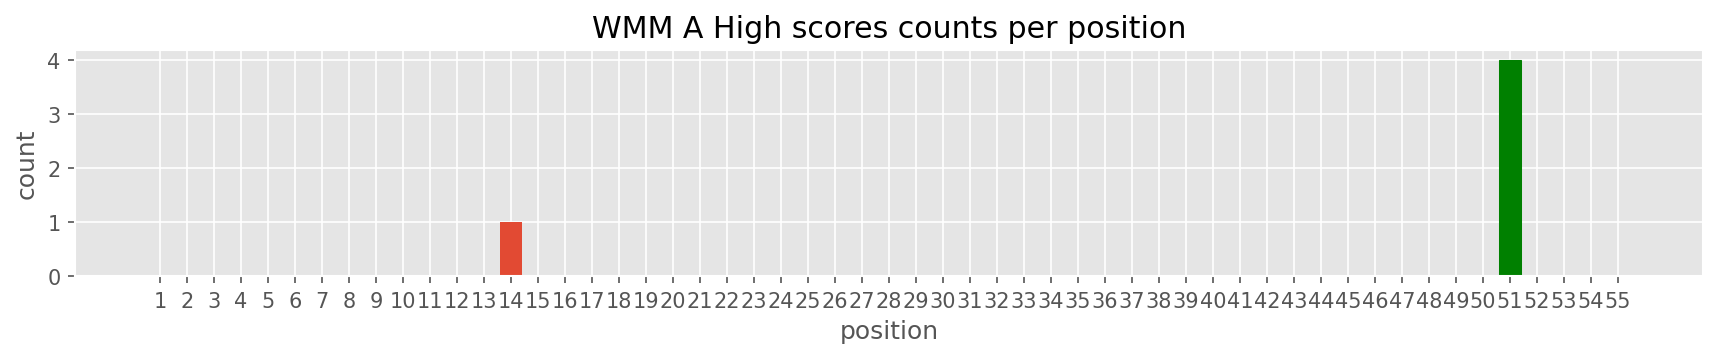

High score histogram for B
Most common location of the best motif hit in each sequence = 12


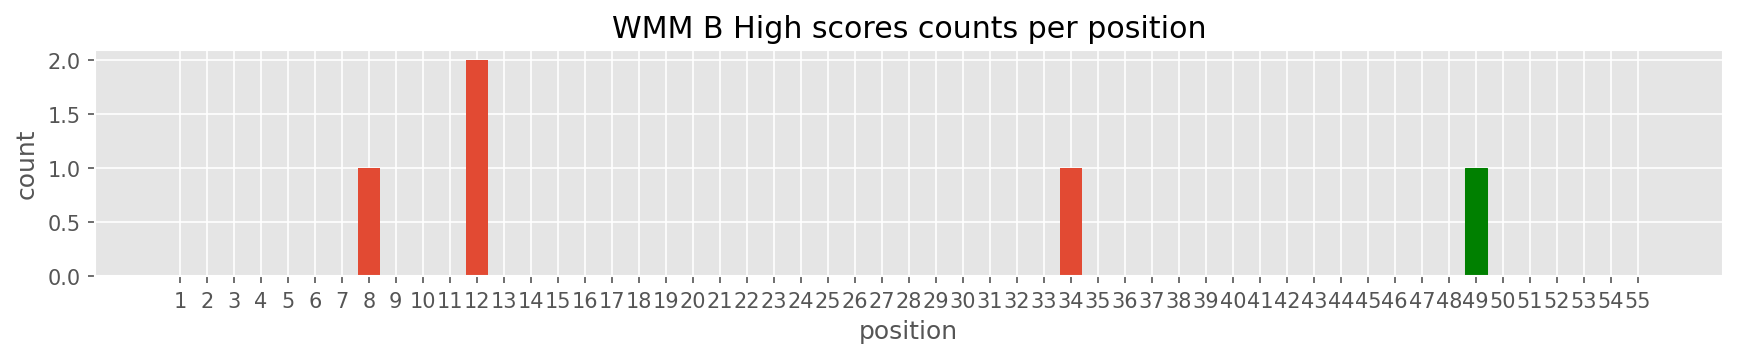

High score histogram for C
Most common location of the best motif hit in each sequence = 18


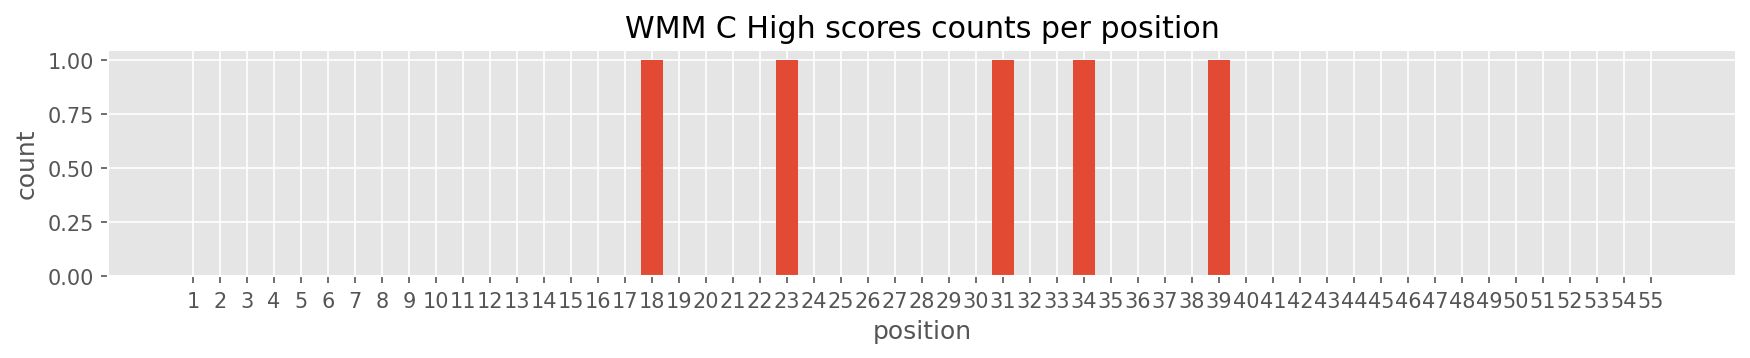

High score histogram for D
Most common location of the best motif hit in each sequence = 51


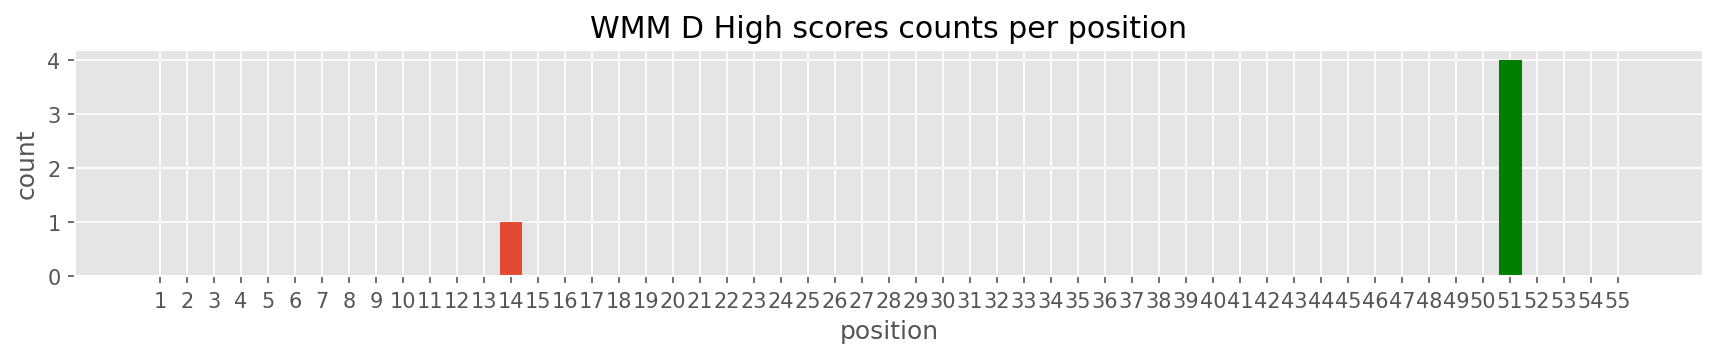

In [12]:

motif_pos = 51
gold_start, gold_end = eval.get_gold_positions(motif_pos, k)
print('gold_start, gold_end = ',gold_start, gold_end)
print('Gold sequence = ',train_sequences[0][50:51+k])
for  eval in evals:
    print(f'High score histogram for {eval.name}')
    eval.plot_highscore_histogram(gold_start, gold_end)

# ROC

Generate an ROC plot for your motif, and calculate AUC. 

To do this for a test set containing n sequences, you will have n * (113 - k + 1) WMM scores, n of them labeled True, and the rest False. 

### ROC plot

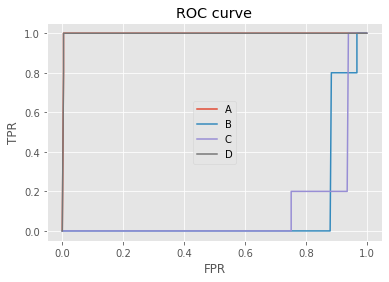

In [13]:
from assignment3.roc import ROC
import matplotlib.pyplot as plt
rocs = []

for eval in evals:
    y_score, y_true = eval.get_y(motif_pos)
    r = ROC(y_true, y_score)
    rocs.append(r)
    r.plot_roc()
plt.legend([e.name for e in evals])

### AUC

In [14]:
for eval, r in zip(evals, rocs):
    print(f'AUC for WMM {eval.name} = {r.calculateAUC():.3f}')

AUC for WMM A = 0.998
AUC for WMM B = 0.101
AUC for WMM C = 0.099
AUC for WMM D = 0.998


### Largest threshold
for WMM C, what is the largest τ recovering all True Positives, how many False Positives, True Negatives and False Negatives are found with the same τ and what are the corresponding TPR and FPR values?

C = lowest Entropy

Reload a module:

import importlib, then do importlib.reload(nameOfModule)
https://stackoverflow.com/questions/1254370/reimport-a-module-in-python-while-interactive

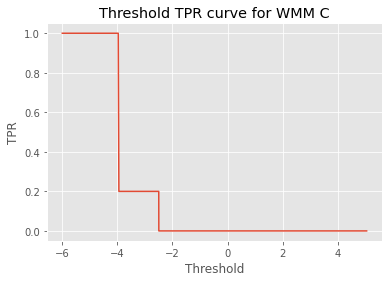

In [15]:
r = rocs[2]
plt.plot(r.thresholds,r.tprs)
plt.xlabel('Threshold')
plt.ylabel('TPR')
plt.title('Threshold TPR curve for WMM C')
plt.show()

In [20]:
t = r.largest_thres_TPR1()
print(f'WMM C: Largest Threshold with TPR 1 for = {t:.3f}')

WMM C: Largest Threshold with TPR 1 for = -3.961


In [19]:
tpr, fpr, tp, fp, tn, fn = r.get_TPR_FPR_TP_FP_TN_FN(t)
print('WMM C : At threshold f {:.3f} , TPR = {}, FPR = {}, tp = {}, fp = {}, tn = {}, fn = {}'.format(t, tpr, fpr, tp, fp, tn, fn))

WMM C : At threshold f -3.961 , TPR = 1.0, FPR = 0.94, tp = 5, fp = 235, tn = 15, fn = 0
